In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'D:/CVR_MINI_PROG/archive (1)/images/images/train'
TEST_DIR = 'D:/CVR_MINI_PROG/archive (1)/images/images/validation'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      D:/CVR_MINI_PROG/archive (1)/images/images/tra...     angry
1      D:/CVR_MINI_PROG/archive (1)/images/images/tra...     angry
2      D:/CVR_MINI_PROG/archive (1)/images/images/tra...     angry
3      D:/CVR_MINI_PROG/archive (1)/images/images/tra...     angry
4      D:/CVR_MINI_PROG/archive (1)/images/images/tra...     angry
...                                                  ...       ...
28816  D:/CVR_MINI_PROG/archive (1)/images/images/tra...  surprise
28817  D:/CVR_MINI_PROG/archive (1)/images/images/tra...  surprise
28818  D:/CVR_MINI_PROG/archive (1)/images/images/tra...  surprise
28819  D:/CVR_MINI_PROG/archive (1)/images/images/tra...  surprise
28820  D:/CVR_MINI_PROG/archive (1)/images/images/tra...  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     D:/CVR_MINI_PROG/archive (1)/images/images/val...     angry
1     D:/CVR_MINI_PROG/archive (1)/images/images/val...     angry
2     D:/CVR_MINI_PROG/archive (1)/images/images/val...     angry
3     D:/CVR_MINI_PROG/archive (1)/images/images/val...     angry
4     D:/CVR_MINI_PROG/archive (1)/images/images/val...     angry
...                                                 ...       ...
7061  D:/CVR_MINI_PROG/archive (1)/images/images/val...  surprise
7062  D:/CVR_MINI_PROG/archive (1)/images/images/val...  surprise
7063  D:/CVR_MINI_PROG/archive (1)/images/images/val...  surprise
7064  D:/CVR_MINI_PROG/archive (1)/images/images/val...  surprise
7065  D:/CVR_MINI_PROG/archive (1)/images/images/val...  surprise

[7066 rows x 2 columns]
0       D:/CVR_MINI_PROG/archive (1)/images/images/val...
1       D:/CVR_MINI_PROG/archive (1)/images/images/val...
2       D:/CVR_MINI_PROG/archive (1)/images/images/val...
3       D

In [36]:
test['image']


0       D:/CVR_MINI_PROG/archive (1)/images/images/val...
1       D:/CVR_MINI_PROG/archive (1)/images/images/val...
2       D:/CVR_MINI_PROG/archive (1)/images/images/val...
3       D:/CVR_MINI_PROG/archive (1)/images/images/val...
4       D:/CVR_MINI_PROG/archive (1)/images/images/val...
                              ...                        
7061    D:/CVR_MINI_PROG/archive (1)/images/images/val...
7062    D:/CVR_MINI_PROG/archive (1)/images/images/val...
7063    D:/CVR_MINI_PROG/archive (1)/images/images/val...
7064    D:/CVR_MINI_PROG/archive (1)/images/images/val...
7065    D:/CVR_MINI_PROG/archive (1)/images/images/val...
Name: image, Length: 7066, dtype: object

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [46]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
import tensorflow as tf

print(tf.__version__)


2.18.0


In [50]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test)) 

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 721ms/step - accuracy: 0.2375 - loss: 1.8356 - val_accuracy: 0.2583 - val_loss: 1.8130
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 722ms/step - accuracy: 0.2549 - loss: 1.8066 - val_accuracy: 0.2539 - val_loss: 1.7751
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 726ms/step - accuracy: 0.2620 - loss: 1.7611 - val_accuracy: 0.3139 - val_loss: 1.6759
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 162s 717ms/step - accuracy: 0.3424 - loss: 1.6492 - val_accuracy: 0.4182 - val_loss: 1.5042
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 720ms/step - accuracy: 0.3938 - loss: 1.5436 - val_accuracy: 0.4527 - val_loss: 1.4139
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 162s 719ms/step - accuracy: 0.4293 - loss: 1.4673 - val_accuracy: 0.4890 - val_loss: 1.3238
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 164s 726ms/step - accuracy: 0.4580 - loss: 1.4174 - val_accuracy: 0.4962 - val_loss: 1.3125
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 719ms/step - accuracy: 0.4636 -

In [51]:
model_json = model.to_json()
with open("expression_emotion_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("expression_emotion_detection_model.h5")

In [52]:
from keras.models import model_from_json

In [ ]:
import pickle

# Save the entire model using Pickle
with open("expression_model_pickle.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as a Pickle file: model_pickle.pkl")

Model saved as a Pickle file: model_pickle.pkl


In [58]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step


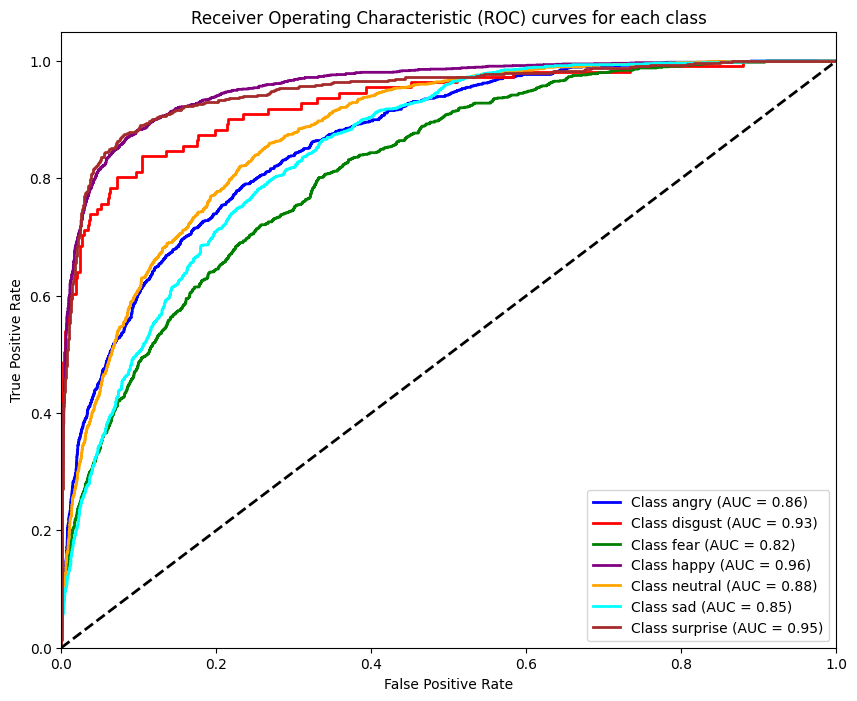

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Get the predictions for the test data
y_score = model.predict(x_test)

# Binarize the output for ROC curve calculation
n_classes = y_test.shape[1]
y_test_binarized = y_test

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {label[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves for each class')
plt.legend(loc="lower right")
plt.show()


221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step


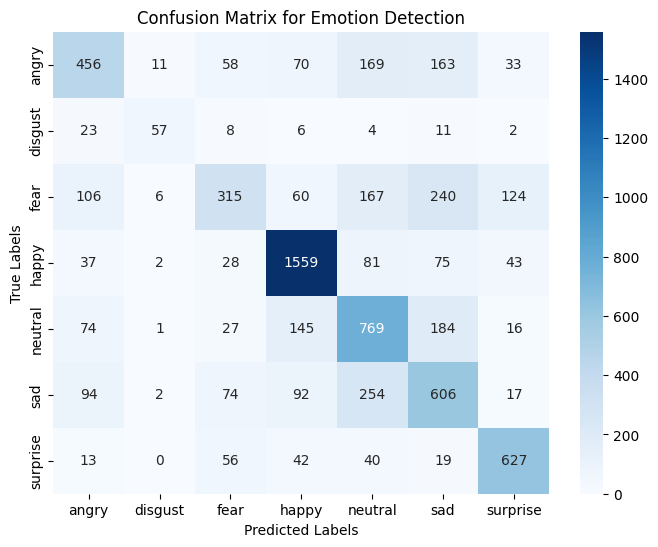

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1)  

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Emotion Detection')
plt.show()


Accuracy Score: 62.11%


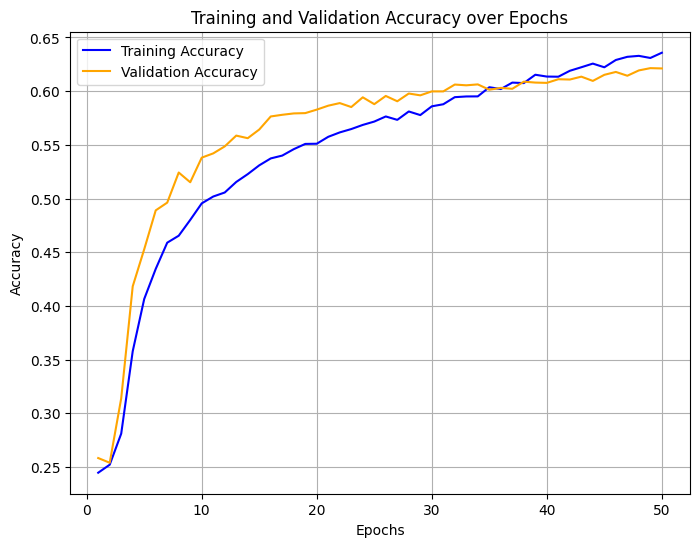

In [57]:
from sklearn.metrics import accuracy_score
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy Score: {accuracy * 100:.2f}%")


import matplotlib.pyplot as plt

# Assuming 'history' is the variable where model.fit() history is stored
# and 'gender_out_accuracy' represents the accuracy for gender classification in your model.

# Extract training and validation accuracy for each epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color='blue')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Training Accuracy: 83.66%
Validation Accuracy: 61.87%


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanAbsoluteError
import numpy as np

# Load the model with custom objects
model = load_model("expression_emotion_detection_model.h5")

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predicting the labels for test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generating the classification report
label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
report = classification_report(true_labels, predicted_labels, target_names=label_names)
print("Classification Report:\n", report)



221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.57      0.47      0.52       960
     disgust       0.72      0.51      0.60       111
        fear       0.56      0.31      0.40      1018
       happy       0.79      0.85      0.82      1825
     neutral       0.52      0.63      0.57      1216
         sad       0.47      0.53      0.50      1139
    surprise       0.73      0.79      0.76       797

    accuracy                           0.62      7066
   macro avg       0.62      0.59      0.59      7066
weighted avg       0.62      0.62      0.61      7066

